In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df_test = pd.read_csv('https://raw.githubusercontent.com/arinaaandreeva/Datasets/main/test_dls_project.csv')
df = pd.read_csv('https://raw.githubusercontent.com/arinaaandreeva/Datasets/main/train_dls_project.csv')
print(df_test.shape, df.shape)

(1761, 19) (5282, 20)


# Первая часть. Исследование

In [ ]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [ ]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
df.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,male,0,yes,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,no,mailed_check,0
1,72,25.85,1872.2,male,0,yes,no,yes,yes,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,credit_card_(automatic),0
2,1,75.90,75.9,male,0,no,no,yes,no,fiber_optic,no,no,no,yes,no,no,month-to-month,yes,electronic_check,1
3,32,79.30,2570,female,1,yes,no,yes,yes,fiber_optic,no,no,yes,no,no,no,month-to-month,no,mailed_check,0
4,60,115.25,6758.45,female,0,yes,yes,yes,yes,fiber_optic,yes,yes,yes,yes,yes,yes,two_year,no,credit_card_(automatic),0


In [ ]:
df.iloc[12:18]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
12,69,99.50,6841.45,male,0,yes,no,yes,yes,fiber_optic,no,no,yes,no,yes,yes,one_year,no,bank_transfer_(automatic),0
13,26,38.85,1025.15,female,0,yes,yes,no,no_phone_service,dsl,yes,yes,no,yes,no,no,month-to-month,no,credit_card_(automatic),0
14,38,102.60,4009.2,male,1,yes,no,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic_check,0
15,30,90.05,2627.2,female,1,yes,no,yes,yes,fiber_optic,no,yes,no,no,yes,no,month-to-month,yes,electronic_check,0
16,52,53.75,2790.65,male,0,no,no,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,electronic_check,0
17,71,90.30,6287.3,male,0,yes,yes,yes,yes,dsl,yes,yes,yes,yes,yes,yes,two_year,no,credit_card_(automatic),0


In [ ]:
tc = pd.to_numeric(df.TotalSpent, errors='coerce')

In [ ]:
df.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

In [ ]:
df.TotalSpent = pd.to_numeric(df.TotalSpent, errors='coerce')

In [ ]:
df.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [ ]:
df.TotalSpent = df.TotalSpent.fillna(0)

Изменяем тип данных столбца "totalspent" с object на float, далее в этом столбце нашли пропущенные данные, которые заменили на 0.

## Анализ данных

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.Churn.value_counts(normalize=True)

0    0.737978
1    0.262022
Name: Churn, dtype: float64

In [ ]:
df[cat_cols].nunique()

Sex                         2
IsSeniorCitizen             2
HasPartner                  2
HasChild                    2
HasPhoneService             2
HasMultiplePhoneNumbers     3
HasInternetService          3
HasOnlineSecurityService    3
HasOnlineBackup             3
HasDeviceProtection         3
HasTechSupportAccess        3
HasOnlineTV                 3
HasMovieSubscription        3
HasContractPhone            3
IsBillingPaperless          2
PaymentMethod               4
dtype: int64

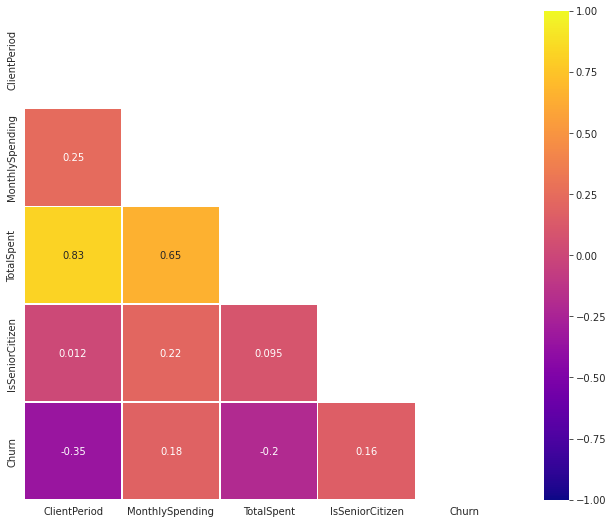

In [ ]:
corr = df.corr(method ='pearson')
corr = corr[np.abs(corr)>0.01] # Clear out so small values

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(11, 9))
    ax = sns.heatmap(corr,annot=True, mask=mask, vmin=-1, vmax=1, square=True,linewidths=.5, cmap="plasma")

([<matplotlib.patches.Wedge at 0x7f808063a410>,
 [Text(-0.041861890518861924, 1.0992031578021357, ''),
  Text(0.0418618905188613, -1.0992031578021357, '')])

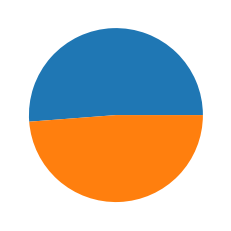

In [ ]:
plt.pie(df['HasPartner'].value_counts())

Text(0.5, 1.0, 'Payment Method')

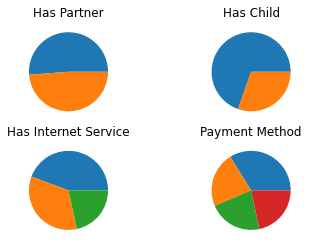

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].pie(df['HasPartner'].value_counts())
axs[0, 0].set_title('Has Partner')
axs[0, 1].pie(df['HasChild'].value_counts())
axs[0, 1].set_title('Has Child')
axs[1, 0].pie(df['HasInternetService'].value_counts())
axs[1, 0].set_title('Has Internet Service')
axs[1, 1].pie(df['PaymentMethod'].value_counts())
axs[1, 1].set_title('Payment Method')

In [ ]:
df.describe()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.486161,0.159409,0.262022
std,24.550326,30.176464,2269.049195,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000,0.000000
25%,9.000000,35.462500,395.725000,0.000000,0.000000
50%,29.000000,70.400000,1405.650000,0.000000,0.000000
75%,55.000000,90.050000,3795.212500,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


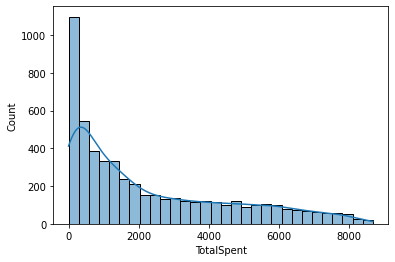

In [ ]:
sns.histplot(df.TotalSpent, bins=30, kde=True)

In [ ]:
TotalSpent_logs = np.log1p(df.TotalSpent)

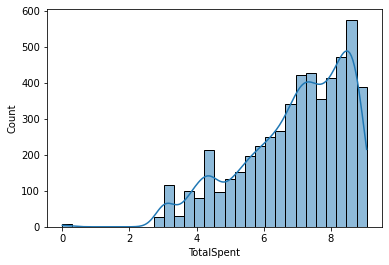

In [ ]:
sns.histplot(TotalSpent_logs, bins=30, kde=True)

Посмотрели распределение признаков, корреляцию. Так наиболее коррелирован "Churn" с "ClientPeriod". Рассматривая столбец с затратами, большая часть клиентов тратит мало, можно применить логарифмирование, чтобы посмотреть более подробно распределние  показателя.

# Training models

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.model_selection import train_test_split

Делим выборку на тестовую и проверочную, преобразовываем списки значений объектов в векторы.

In [ ]:
df_train, df_val = train_test_split(df, test_size=0.25, random_state=1)

In [ ]:
y_train = df.Churn.values
y_val = df_val.Churn.values

del df['Churn']
del df_val['Churn']

In [ ]:
dv = DictVectorizer(sparse=False)

train_dict = df[feature_cols].to_dict(orient='records')
y_train = dv.fit_transform(train_dict)

df_train_dict = df[feature_cols].to_dict(orient='records')
df_train = dv.fit_transform(df_train_dict)

test_dict = df_test[feature_cols].to_dict(orient='records')
df_test = dv.transform(test_dict)

val_dict = df_val[feature_cols].to_dict(orient='records')
val_test = dv.transform(val_dict)

#test_dict = y_train[feature_cols].to_dict(orient='records')
#y_train = dv.transform(y_test_dict)

## Обучение моделей

### DecisionTree


In [ ]:
dt = DecisionTreeRegressor(max_depth = 2)
dt.fit(df_train, y_train)

y_pred = dt.predict(df_test)

r2 = r2_score(df_test, y_pred)
rmse= MSE(df_test,y_pred, squared=False)
print(f"r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")


r2 score: -0.021   RMSE: 11.754


### RandomForest

In [ ]:
rndforest = RandomForestRegressor(random_state=155)
rndforest.fit(df_train, y_train)

y_pred = rndforest.predict(df_test)

r2 = r2_score(df_test, y_pred)
rmse= MSE(df_test,y_pred, squared=False)
print(f"r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

r2 score: -0.011   RMSE: 1.952


In [ ]:
parameters = {'max_depth' : [2,5,10, 15],
              'min_samples_leaf' : [1, 5, 10, 15]
              }
dt_v2 = GridSearchCV(dt, parameters, cv=10, n_jobs=-1)

dt_v2.fit(df_train, y_train)

print('Best results with Parameters', dt_v2.best_params_)

y_pred = dt_v2.best_estimator_.predict(df_test)

r2 = r2_score(df_test, y_pred)
rmse= MSE(df_test,y_pred, squared=False)
print(f"Best r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

Best results with Parameters {'max_depth': 15, 'min_samples_leaf': 10}
Best r2 score: 0.035   RMSE: 2.093


### Linear and Logistig

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin = LinearRegression()
lin.fit(df_train, y_train)

y_pred_1 = lin.predict(df_test)

r2 = r2_score(df_test, y_pred_1)
rmse= MSE(df_test,y_pred_1, squared=False)
print(f"r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

r2 score: 0.067   RMSE: 0.333


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn import preprocessing
from sklearn import utils
logr = LogisticRegression(penalty='l2')
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_val)

In [ ]:
logr.fit(val_test, encoded)
y_pred = logr.predict(val_test)

r2 = r2_score(y_val, y_pred)
rmse= MSE(y_val,y_pred, squared=False)
print(f"r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

r2 score: 0.07   RMSE: 0.424


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Lasso and Ridge

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
las = Lasso()
las.fit(df_train, y_train)

y_pred = las.predict(df_test)

r2 = r2_score(df_test, y_pred)
rmse= MSE(df_test,y_pred, squared=False)
print(f"r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

r2 score: 0.045   RMSE: 0.39


In [ ]:
las_parameters = {'max_iter': [2500, 5000, 10000],
                'alpha': [0.5, 1, 1.5]
                }

las_v2 = GridSearchCV(las, las_parameters, cv=10, n_jobs=-1)


las_v2.fit(df_train, y_train)

print('Best results with Parameters', las_v2.best_params_)

y_pred = las_v2.best_estimator_.predict(df_test)

r2 = r2_score(df_test, y_pred)
rmse= MSE(df_test,y_pred, squared=False)
print(f"Best r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

Best results with Parameters {'alpha': 0.5, 'max_iter': 2500}
Best r2 score: 0.046   RMSE: 0.399


In [ ]:
rid = Ridge()
rid.fit(df_train, y_train)

y_pred = rid.predict(df_test)

r2 = r2_score(df_test, y_pred)
rmse= MSE(df_test,y_pred, squared=False)
print(f"r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

r2 score: 0.067   RMSE: 0.334


In [ ]:
rid_parameters = {'max_iter': [1000, 25000, 5000],
                'alpha': [1, 1.5, 2]
                }

rid_v2 = GridSearchCV(rid, rid_parameters, cv=10, n_jobs=-1)


rid_v2.fit(df_train, y_train)

print('Best results with Parameters',rid_v2.best_params_)

y_pred = rid_v2.best_estimator_.predict(df_test)

r2 = r2_score(df_test, y_pred)
rmse= MSE(df_test,y_pred, squared=False)
print(f"Best r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

Best results with Parameters {'alpha': 1, 'max_iter': 1000}
Best r2 score: 0.067   RMSE: 0.334


### XGBoost

In [ ]:
import xgboost as xg

In [ ]:
xgb_r_parameters = {'n_estimators': [100, 200, 500],
                'seed': [10, 25, 50, 100],
                'learning_rate': [0.001, 0.01, 0.5]
                }
xgb_r = xg.XGBRegressor()
xgb_r_v2 = GridSearchCV(xgb_r, xgb_r_parameters, cv=10, n_jobs=-1)


xgb_r_v2.fit(val_test, encoded)

print('Best results with Parameters', xgb_r_v2.best_params_)

y_pred = xgb_r_v2.best_estimator_.predict(val_test)

r2 = r2_score(y_val, y_pred)
rmse= MSE(y_val, y_pred, squared=False)
print(f"Best r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

[15:32:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best results with Parameters {'learning_rate': 0.01, 'n_estimators': 500, 'seed': 10}
Best r2 score: 0.451   RMSE: 0.326


In [ ]:
xgb_r = xg.XGBRegressor(learning_rate = 0.01, n_estimators = 200, seed = 25)

xgb_r.fit(val_test, encoded)

y_pred = xgb_r.predict(val_test)

r2 = r2_score(y_val, y_pred)
rmse= MSE(y_val, y_pred, squared=False)
print(f"r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

[15:32:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score: 0.36   RMSE: 0.352


### Сохраняем предсказания лучшей модели. В моём случае это модель XGBRegressorс парметрами learning_rate = 0.01, n_estimators = 200, seed = 25

In [ ]:
sub = pd.read_csv('/content/submission.csv').set_index('Id')

In [ ]:
sub['Churn'] =xgb_r.predict(df_test)

In [ ]:
sub.to_csv('./sub_6.csv')

# P.S. Kaggle Competition info
### Место: 2602
### Score: 0.788
### Имя: Peach